In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA

In [4]:
# loads csv file
full_data = pd.read_csv('food-consumption.csv').copy()
food_data = full_data.set_index('Country')
food_data

Real coffee  Instant coffee  Tea  Sweetener  Biscuits  \
Country                                                              
Germany               90              49   88         19        57   
Italy                 82              10   60          2        55   
France                88              42   63          4        76   
Holland               96              62   98         32        62   
Belgium               94              38   48         11        74   
Luxembourg            97              61   86         28        79   
England               27              86   99         22        91   
Portugal              72              26   77          2        22   
Austria               55              31   61         15        29   
Switzerland           73              72   85         25        31   
Sweden                97              13   93         31        61   
Denmark               96              17   92         35        66   
Norway                92              17   83         13        62   
Finland               98              12   84         20        64   
Spain                 70              40   40         18        62   
Ireland               30              52   99         11        80   

             Powder soup  Tin soup  Potatoes  Frozen fish  Frozen veggies  \
Country                                                                     
Germany               51        19        21           27              21   
Italy                 41         3         2            4               2   
France                53        11        23           11               5   
Holland               67        43         7           14              14   
Belgium               37        23         9           13              12   
Luxembourg            73        12         7           26              23   
England               55        76        17           20              24   
Portugal              34         1         5           20               3   
Austria               33         1         5           15              11   
Switzerland           69        10        17           19              15   
Sweden                43        43        39           54              45   
Denmark               32        17        11           51              42   
Norway                51         4        17           30              15   
Finland               27        10         8           18              12   
Spain                 43         2        14           23               7   
Ireland               75        18         2            5               3   

             Apples  Oranges  Tinned fruit  Jam  Garlic  Butter  Margarine  \
Country                                                                      
Germany          81       75            44   71      22      91         85   
Italy            67       71             9   46      80      66         24   
France           87       84            40   45      88      94         47   
Holland          83       89            61   81      15      31         97   
Belgium          76       76            42   57      29      84         80   
Luxembourg       85       94            83   20      91      94         94   
England          76       68            89   91      11      95         94   
Portugal         22       51             8   16      89      65         78   
Austria          49       42            14   41      51      51         72   
Switzerland      79       70            46   61      64      82         48   
Sweden           56       78            53   75       9      68         32   
Denmark          81       72            50   64      11      92         91   
Norway           61       72            34   51      11      63         94   
Finland          50       57            22   37      15      96         94   
Spain            59       77            30   38      86      44         51   
Ireland          57       52           

In [5]:
# normalizes data
norm = (food_data - food_data.mean())/food_data.std()
norm.head()

Real coffee  Instant coffee       Tea  Sweetener  Biscuits  \
Country                                                               
Germany     0.494150        0.421214  0.512404   0.094944 -0.192373   
Italy       0.148515       -1.263643 -0.997840  -1.519109 -0.296712   
France      0.407741        0.118804 -0.836028  -1.329220  0.798839   
Holland     0.753376        0.982834  1.051777   1.329220  0.068472   
Belgium     0.666967       -0.054002 -1.645088  -0.664610  0.694501   

         Powder soup  Tin soup  Potatoes  Frozen fish  Frozen veggies  \
Country                                                                 
Germany     0.129641  0.034071  0.861684     0.366586        0.400705   
Italy      -0.518563 -0.758861 -1.122801    -1.278581       -1.084834   
France      0.259281 -0.362395  1.070578    -0.777878       -0.850276   
Holland     1.166767  1.223470 -0.600568    -0.563291       -0.146599   
Belgium    -0.777844  0.232304 -0.391675    -0.634820       -0.302972   

           Apples   Oranges  Tinned fruit       Jam    Garlic    Butter  \
Country                                                                   
Germany  0.806974  0.320666      0.088685  0.699895 -0.585763  0.726326   
Italy    0.010665  0.035630     -1.416274 -0.406658  1.086815 -0.469273   
France   1.148249  0.961998     -0.083310 -0.450920  1.317515  0.869798   
Holland  0.920732  1.318294      0.819665  1.142516 -0.787625 -2.143111   
Belgium  0.522578  0.391925      0.002687  0.080225 -0.383900  0.391559   

         Margarine  Olive oil   Yoghurt  Crisp bread  
Country                                               
Germany   0.591250   0.686918  0.514657    -0.069925  
Italy    -1.680640   1.380337 -0.848673    -0.389585  
France   -0.824026  -0.630578  1.987053    -0.988946  
Holland   1.038179  -1.428009  1.768920    -0.509457  
Belgium   0.405030   0.998956 -0.030675    -0.909031

In [6]:
# specifies first two pricipal components
pca = sklearn.decomposition.PCA(n_components = 2)
tablePCA = pca.fit_transform(norm)
tablePCA = pd.DataFrame(tablePCA, index=norm.index)
tablePCA

0         1
Country                        
Germany      1.324335  0.114553
Italy       -3.628865  0.418082
France      -0.595292  2.242847
Holland      2.651111  1.720402
Belgium     -0.743396  0.813356
Luxembourg   1.612726  1.893894
England      3.886019  1.795457
Portugal    -4.629330 -0.989962
Austria     -3.100302 -0.862722
Switzerland  0.487252  1.506437
Sweden       3.234591 -4.215753
Denmark      2.395507 -2.575662
Norway       0.097321 -2.017211
Finland     -0.700805 -2.268353
Spain       -2.329328  0.405087
Ireland      0.038455  2.019548

Text(0, 0.5, 'Principal Component 2')

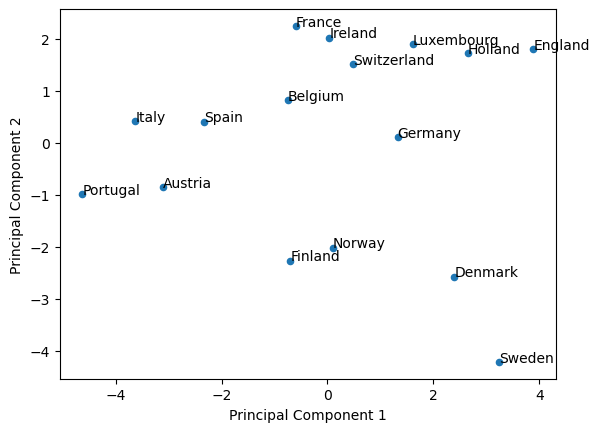

In [11]:
# plots data
a = tablePCA.plot.scatter(x=0, y=1)
for i,r in tablePCA.iterrows():
    a.text(r[0], r[1], i)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#Seems that Switzerland, Ireland, France seem to share similar food tastes
#Sweden is by itself indicating that the countries food taste are different to other countries

In [13]:
# Transposes dataframe
df_transposed = food_data.T
df_transposed.head()

Country         Germany  Italy  France  Holland  Belgium  Luxembourg  England  \
Real coffee          90     82      88       96       94          97       27   
Instant coffee       49     10      42       62       38          61       86   
Tea                  88     60      63       98       48          86       99   
Sweetener            19      2       4       32       11          28       22   
Biscuits             57     55      76       62       74          79       91   

Country         Portugal  Austria  Switzerland  Sweden  Denmark  Norway  \
Real coffee           72       55           73      97       96      92   
Instant coffee        26       31           72      13       17      17   
Tea                   77       61           85      93       92      83   
Sweetener              2       15           25      31       35      13   
Biscuits              22       29           31      61       66      62   

Country         Finland  Spain  Ireland  
Real coffee          98     70       30  
Instant coffee       12     40       52  
Tea                  84     40       99  
Sweetener            20     18       11  
Biscuits             64     62       80

In [15]:
# normalizes data
norm_two = (df_transposed - df_transposed.mean())/df_transposed.std()
norm_two

Country          Germany     Italy    France   Holland   Belgium  Luxembourg  \
Real coffee     1.376165  1.386946  1.280670  1.372233  1.612505    1.121477   
Instant coffee -0.110601 -0.834636 -0.186598  0.320239 -0.251278    0.041980   
Tea             1.303640  0.708129  0.483242  1.434115  0.081541    0.791631   
Sweetener      -1.198478 -1.081478 -1.398690 -0.607991 -1.149888   -0.947558   
Biscuits        0.179500  0.553853  0.897904  0.320239  0.946868    0.581729   
Powder soup    -0.038076  0.121878  0.164270  0.474944 -0.284560    0.401813   
Tin soup       -1.198478 -1.050623 -1.175410 -0.267640 -0.750506   -1.427335   
Potatoes       -1.125953 -1.081478 -0.792644 -1.381515 -1.216451   -1.577265   
Frozen fish    -0.908378 -1.019768 -1.175410 -1.164928 -1.083324   -1.007530   
Frozen veggies -1.125953 -1.081478 -1.366792 -1.164928 -1.116606   -1.097488   
Apples          1.049802  0.924116  1.248773  0.970000  1.013432    0.761645   
Oranges         0.832226  1.047537  1.153082  1.155646  1.013432    1.031519   
Tinned fruit   -0.291914 -0.865491 -0.250393  0.289298 -0.118151    0.701673   
Jam             0.687176  0.276155 -0.090907  0.908118  0.381077   -1.187446   
Garlic         -1.089690  1.325235  1.280670 -1.133988 -0.550815    0.941561   
Butter          1.412427  0.893261  1.472053 -0.638932  1.279687    1.031519   
Margarine       1.194852 -0.402662 -0.027113  1.403174  1.146560    1.031519   
Olive oil       0.795964  1.757209 -0.377981 -1.195869  1.246405    0.731659   
Yoghurt        -0.799590 -0.988912  0.291859  0.041770 -0.850351   -0.857600   
Crisp bread    -0.944640 -0.587793 -1.430587 -1.133988 -1.349579   -1.067502   

Country          England  Portugal   Austria  Switzerland    Sweden   Denmark  \
Real coffee    -0.900948  1.151477  1.148916     0.921290  1.667422  1.535762   
Instant coffee  0.879821 -0.276230 -0.019473     0.880793 -1.421078 -1.087485   
Tea             1.272193  1.306663  1.441013     1.407244  1.520351  1.402939   
Sweetener      -1.051861 -1.021121 -0.798399    -1.022530 -0.759256 -0.489783   
Biscuits        1.030733 -0.400379 -0.116839    -0.779553  0.343779  0.539592   
Powder soup    -0.055838 -0.027933  0.077893     0.759305 -0.318042 -0.589400   
Tin soup        0.577995 -1.052159 -1.479960    -1.629974 -0.318042 -1.087485   
Potatoes       -1.202774 -0.928010 -1.285228    -1.346500 -0.465113 -1.286719   
Frozen fish    -1.112226 -0.462453 -0.798399    -1.265508  0.086404  0.041507   
Frozen veggies -0.991496 -0.990084 -0.993131    -1.427493 -0.244506 -0.257344   
Apples          0.577995 -0.400379  0.856819     1.164267  0.159940  1.037677   
Oranges         0.336535  0.499698  0.516039     0.799801  0.968833  0.738826   
Tinned fruit    0.970368 -0.834899 -0.847082    -0.172109  0.049637  0.008301   
Jam             1.030733 -0.586602  0.467356     0.435335  0.858529  0.473181   
Garlic         -1.383869  1.679109  0.954184     0.556823 -1.568149 -1.286719   
Butter          1.151463  0.934218  0.954184     1.285756  0.601154  1.402939   
Margarine       1.121281  1.337700  1.976525    -0.091117 -0.722488  1.369733   
Olive oil       0.004527  1.772220 -0.165522     0.435335 -0.134203 -0.655812   
Yoghurt        -1.383869 -0.896973 -0.895765    -0.091117 -1.825524 -1.286719   
Crisp bread    -0.870766 -0.803862 -0.993131    -0.820049  1.520351 -0.522989   

Country           Norway   Finland     Spain   Ireland  
Real coffee     1.646755  1.781229  1.086937 -0.278430  
Instant coffee -0.878943 -0.920459 -0.045289  0.369767  
Tea             1.343671  1.341419 -0.045289  1.754551  
Sweetener      -1.013647 -0.669139 -0.875588 -0.838236  
Biscuits        0.636476  0.713120  0.785010  1.194744  
Powder soup     0.266040 -0.449234  0.067934  1.047427  
Tin soup       -1.316730 -0.983288 -1.479442 -0.631992  
Potatoes       -0.878943 -1.046118 -1.026552 -1.103408  
Frozen fish    -0.441155 -0.731969 -0.686884 -1.015017  
Frozen veggies -0.946295 -0.920459 -1.290738 -1

In [17]:
tablePCA_two = pca.fit_transform(norm_two)
tablePCA_two = pd.DataFrame(tablePCA_two, index=norm_two.index)
tablePCA_two

0         1
Real coffee     4.579187  0.010900
Instant coffee -0.856247  0.672441
Tea             4.265496 -1.537581
Sweetener      -3.729885 -0.247725
Biscuits        1.788881 -0.661202
Powder soup     0.403327  0.315813
Tin soup       -3.995102 -1.080768
Potatoes       -4.462741  0.055869
Frozen fish    -3.225246 -0.426477
Frozen veggies -4.052051 -0.579808
Apples          2.950739 -0.006038
Oranges         3.306074  0.255752
Tinned fruit   -0.725792 -0.835710
Jam             1.143441 -1.653466
Garlic         -0.188902  4.599840
Butter          4.059370 -0.359824
Margarine       3.348317 -0.682084
Olive oil       1.221431  2.827126
Yoghurt        -3.251141  1.013882
Crisp bread    -2.579158 -1.680942

Text(0, 0.5, 'Principal Component 2')

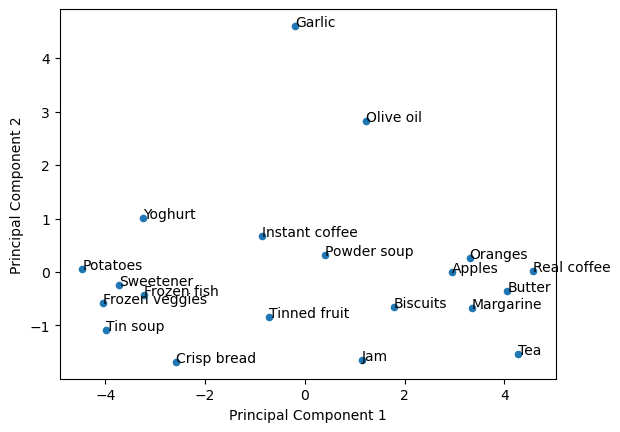

In [44]:
# Plots data
s = tablePCA_two.plot.scatter(x=0, y=1)
for i,r in tablePCA_two.iterrows():
    s.text(r[0], r[1], i)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Potatoes, sweetener, frozen fish, frozen veggies, and tin soup are
# grouped together.
# Fruits like oranges and apples are also grouped closely together
# Cooking oils like margarine and butter are also grouped closely together
# Garlic is by itself :(

In [46]:
# reads csv file
# unfortunately file too big for git :(
bike_data = pd.read_csv('201906-citibike-tripdata.csv')
bike_data

tripduration                 starttime                  stoptime  \
0                 330  2019-06-01 00:00:01.5000  2019-06-01 00:05:31.7600   
1                 830  2019-06-01 00:00:04.2400  2019-06-01 00:13:55.1470   
2                 380  2019-06-01 00:00:06.0190  2019-06-01 00:06:26.7790   
3                1155  2019-06-01 00:00:06.7760  2019-06-01 00:19:22.5380   
4                1055  2019-06-01 00:00:07.5200  2019-06-01 00:17:42.5580   
...               ...                       ...                       ...   
2125365           232  2019-06-30 23:59:32.8920  2019-07-01 00:03:25.6310   
2125366           477  2019-06-30 23:59:33.6990  2019-07-01 00:07:31.0440   
2125367           300  2019-06-30 23:59:47.4050  2019-07-01 00:04:48.1850   
2125368           906  2019-06-30 23:59:51.5980  2019-07-01 00:14:58.3210   
2125369          1270  2019-06-30 23:59:54.3670  2019-07-01 00:21:05.2750   

         start station id              start station name  \
0                    3602                  31 Ave & 34 St   
1                    3054         Greene Ave & Throop Ave   
2                     229                  Great Jones St   
3                    3771         McKibbin St & Bogart St   
4                     441                 E 52 St & 2 Ave   
...                   ...                             ...   
2125365              3113  Greenpoint Ave & Manhattan Ave   
2125366               445              E 10 St & Avenue A   
2125367              3307          West End Ave & W 94 St   
2125368               402              Broadway & E 22 St   
2125369              3788                  E 12 St & 4 Av   

         start station latitude  start station longitude  end station id  \
0                     40.763154               -73.920827            3570   
1                     40.689493               -73.942061            3781   
2                     40.727434               -73.993790             326   
3                     40.706237               -73.933871            3016   
4                     40.756014               -73.967416            3159   
...                         ...                      ...             ...   
2125365               40.730260               -73.953940            3107   
2125366               40.727408               -73.981420            3737   
2125367               40.794165               -73.974124            3320   
2125368               40.740343               -73.989551             400   
2125369               40.732690               -73.989740             326   

                     end station name  end station latitude  \
0                      35 Ave & 37 St             40.755733   
1               Greene Av & Myrtle Av             40.698568   
2                     E 11 St & 1 Ave             40.729538   
3                   Kent Ave & N 7 St             40.720368   
4                  W 67 St & Broadway             40.774925   
...                               ...                   ...   
2125365      Bedford Ave & Nassau Ave             40.723117   
2125366       Stanton St & Norfolk St             40.720747   
2125367  Central Park West & W 100 St             40.794067   
2125368          Pitt St & Stanton St             40.719261   
2125369               E 11 St & 1 Ave             40.729538   

         end station longitude  bikeid    usertype  birth year  gender  
0                   -73.923661   20348  Subscriber        1992       1  
1                   -73.918877   34007  Subscriber        1987       2  
2                   -73.984267   20587  Subscriber        1990       2  
3                   -73.961651   33762  Subscriber        1987       1  
4                   -73.982666   31290  Subscriber        1973       1  
...                        ...     ...         ...         ...     ...  
2125365             -73.952123   25779  Subscriber        1972       1  
2125366             -73.986274   39522  Subscriber        1981       2  
2125367             -73.

In [47]:
# combines latitude and longitude of all bike stations into one data frame
latitude_combined = pd.concat([bike_data['start station latitude'], bike_data['end station latitude']], ignore_index=True)
longitude_combined = pd.concat([bike_data['start station longitude'], bike_data['end station longitude']], ignore_index=True)

data = {'latitude': latitude_combined, 'longitude': longitude_combined}
new_df = pd.DataFrame(data)
new_df


latitude  longitude
0        40.763154 -73.920827
1        40.689493 -73.942061
2        40.727434 -73.993790
3        40.706237 -73.933871
4        40.756014 -73.967416
...            ...        ...
4250735  40.723117 -73.952123
4250736  40.720747 -73.986274
4250737  40.794067 -73.962868
4250738  40.719261 -73.981780
4250739  40.729538 -73.984267

[4250740 rows x 2 columns]

In [51]:
# drops all duplicate coordinates
bike_uniq_coords = new_df.drop_duplicates()
bike_uniq_coords = bike_uniq_coords.reset_index()
bike_uniq_coords = bike_uniq_coords.drop('index', axis=1)
bike_uniq_coords

latitude  longitude
0    40.763154 -73.920827
1    40.689493 -73.942061
2    40.727434 -73.993790
3    40.706237 -73.933871
4    40.756014 -73.967416
..         ...        ...
801  40.730897 -74.063913
802  40.728745 -74.032108
803  40.733670 -74.062500
804  40.742677 -74.051789
805  40.749013 -73.988484

[806 rows x 2 columns]

C:\Users\joyly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\joyly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\joyly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\joyly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

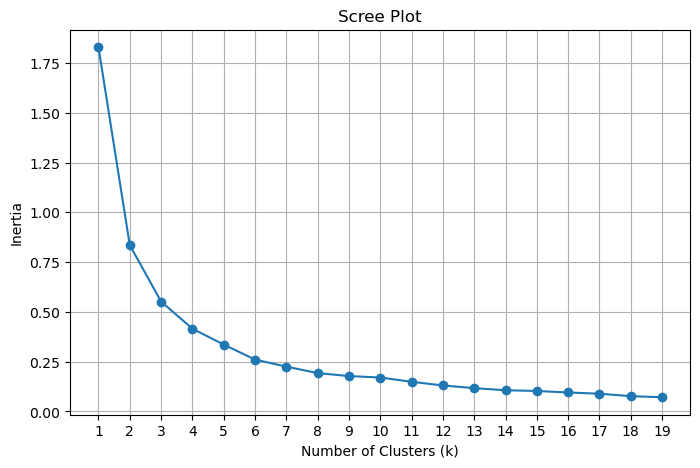

In [54]:
# creates scree plot to find optimal k value
# basically need to look for elbow point, so when the line starts to plateau 
from sklearn.cluster import KMeans
k_values = range(1, 20)  

X = bike_uniq_coords.values

inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Scree Plot')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [57]:
# i choose 4 for my optimal k
# basically assigns each coordinate to a cluster group 
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pred_optimal = kmeans.fit_predict(X)
bike_uniq_coords['cluster_optimal'] = pred_optimal
bike_uniq_coords

C:\Users\joyly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


latitude  longitude  cluster_optimal
0    40.763154 -73.920827                0
1    40.689493 -73.942061                3
2    40.727434 -73.993790                2
3    40.706237 -73.933871                3
4    40.756014 -73.967416                0
..         ...        ...              ...
801  40.730897 -74.063913                2
802  40.728745 -74.032108                2
803  40.733670 -74.062500                2
804  40.742677 -74.051789                2
805  40.749013 -73.988484                2

[806 rows x 3 columns]

C:\Users\joyly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


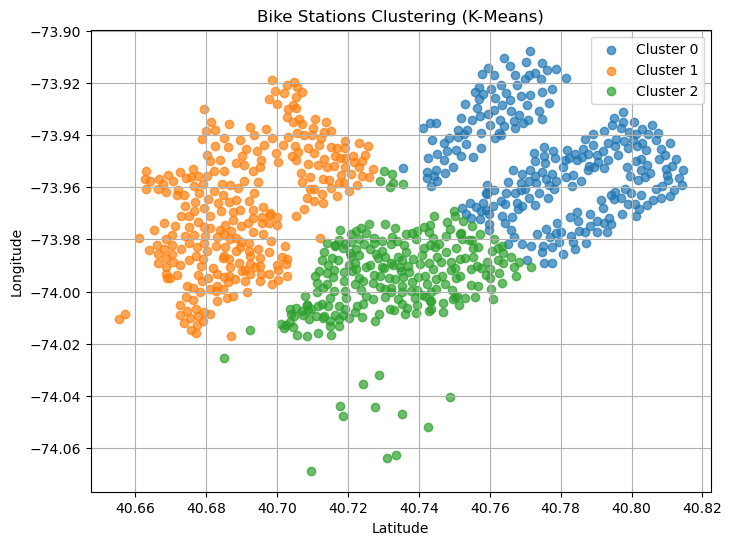

In [59]:
# creates a scatter plot using k = 3 for kmeans
kmeans_3 = KMeans(n_clusters=3, random_state=42)
pred_k_3 = kmeans_3.fit_predict(X)
bike_uniq_coords['cluster_3'] = pred_k_3

clusters = bike_uniq_coords['cluster_3'].unique()
plt.figure(figsize=(8, 6))
for cluster in clusters:
    cluster_data = bike_uniq_coords[bike_uniq_coords['cluster_3'] == cluster]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'],
                label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Bike Stations Clustering (K-Means)')
plt.legend() 
plt.grid(True)
plt.show()

In [61]:
# using DBSCAN to assign cluster labels to each coordinate!
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = .006, min_samples = 4)
pred_db = db.fit_predict(X)
bike_uniq_coords['cluster_db'] = pred_db
bike_uniq_coords

latitude  longitude  cluster_optimal  cluster_3  cluster_db
0    40.763154 -73.920827                0          0           0
1    40.689493 -73.942061                3          1           1
2    40.727434 -73.993790                2          2           2
3    40.706237 -73.933871                3          1           1
4    40.756014 -73.967416                0          0           2
..         ...        ...              ...        ...         ...
801  40.730897 -74.063913                2          2          -1
802  40.728745 -74.032108                2          2          -1
803  40.733670 -74.062500                2          2          -1
804  40.742677 -74.051789                2          2          -1
805  40.749013 -73.988484                2          2           2

[806 rows x 5 columns]

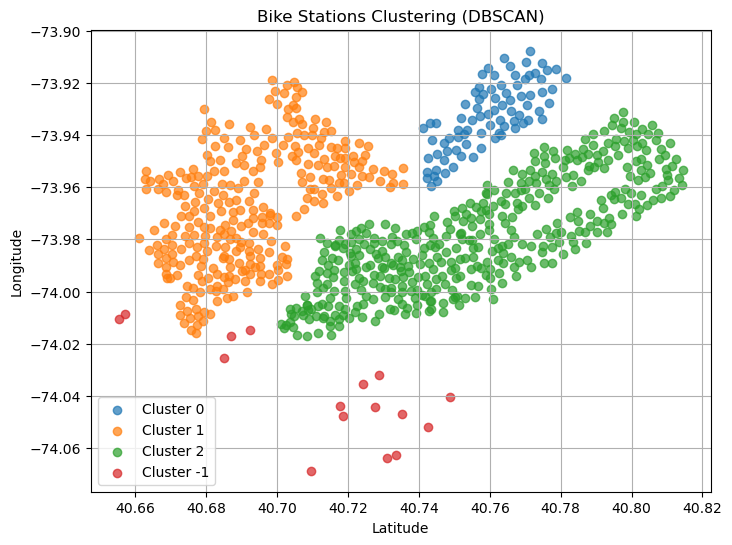

In [63]:
# creates a scatter plot of the DBSCAN clustering
clusters_db = bike_uniq_coords['cluster_db'].unique()
plt.figure(figsize=(8, 6))
for cluster in clusters_db:
    cluster_data = bike_uniq_coords[bike_uniq_coords['cluster_db'] == cluster]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'],
                label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Bike Stations Clustering (DBSCAN)')
plt.legend() 
plt.grid(True)
plt.show()

# It seems DBSCAN performs better because the clustering makes more sense compared to using k-means. 
# For example, cluster 0 in k-means clustering includes some of the points in cluster 2 in DBSCAN when 
# it makes more sense that it shouldn’t because of the spacing between the grouping.